In [52]:
import math
import statistics
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [53]:
data = pd.read_csv('Advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [41]:
def covarianza(x,y):
    cov = 0
    for i in range(len(y)):
        cov += (x[i]-np.mean(x))*(y[i]-np.mean(y))
    cov = cov/len(y)
    return cov
print("Covarianza tv: ", covarianza(data['TV'],data['Sales']))
print("Covarianza Radio",covarianza(data['Radio'],data['Sales']))
print("Covarianza Newspaper: ",covarianza(data['Newspaper'],data['Sales']))

Covarianza tv:  348.6382437499999
Covarianza Radio 44.412509999999976
Covarianza Newspaper:  25.811684999999997


In [42]:
col_names = ['TV', 'Radio', 'Newspaper', 'Sales']

matrix = [['_________'] + col_names]
for col1 in col_names:
  row = [col1]
  for col2 in col_names:
    # print(col1, col2)
    row.append(covarianza(data[col1],data[col2]))
  matrix.append(row)

# print(matrix)
for row in matrix:
    print(row)


['_________', 'TV', 'Radio', 'Newspaper', 'Sales']
['TV', 7334.095143750006, 69.51317999999996, 105.38985499999998, 348.6382437499999]
['Radio', 69.51317999999996, 219.32560400000003, 113.92449400000008, 44.412509999999976]
['Newspaper', 105.38985499999998, 113.92449400000008, 471.9367840000003, 25.811684999999997]
['Sales', 348.6382437499999, 44.412509999999976, 25.811684999999997, 27.085743749999985]


In [43]:
data.cov()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,3350.000000,88.027387,-95.110050,-195.311558,-15.587186
TV,88.027387,7370.949893,69.862492,105.919452,350.390195
Radio,-95.110050,69.862492,220.427743,114.496979,44.635688
Newspaper,-195.311558,105.919452,114.496979,474.308326,25.941392
Sales,-15.587186,350.390195,44.635688,25.941392,27.221853


In [44]:
def pearson(x,y):
    corr_pearson = 0
    corr_pearson = ( (covarianza(x,y)) / math.sqrt(covarianza(x,x) * covarianza(y,y)) )
    return corr_pearson

print("Pearson TV - Sales: ", pearson(data['TV'],data['Sales']))

Pearson TV - Sales:  0.7822244248616061


In [45]:
def correlacion_Pearson(X, Y):
  return covarianza(X, Y) / math.sqrt(covarianza(X, X) * covarianza(Y, Y))

colnames = ['TV', 'Radio', 'Newspaper']

for col in colnames:
  print(correlacion_Pearson(data[col], data['Sales']))

0.7822244248616061
0.576222574571055
0.22829902637616528


In [46]:
colnames = ['TV', 'Radio', 'Newspaper', 'Sales']
print(data[colnames].corr())

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000


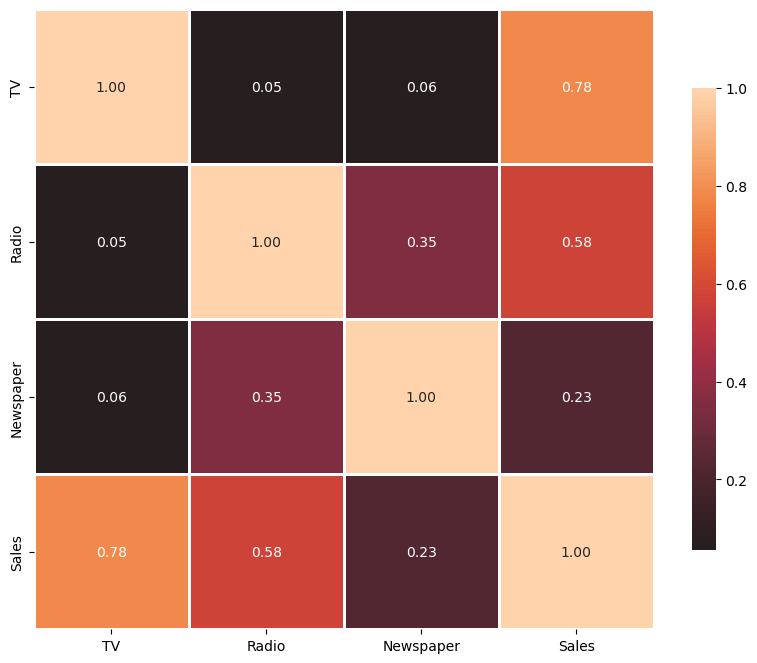

In [50]:
import seaborn as sns

def mapa_de_calor_correlacion(data):
    correlaciones = data[colnames].corr()
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlaciones, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=1, annot=True, cbar_kws={"shrink": .60})
    plt.show();
colnames = ['TV', 'Radio', 'Newspaper', 'Sales']

mapa_de_calor_correlacion(data)